In [ ]:
# Names: Justin M, Fredy S, Oscar D
# CSCI 355 AI GROUP PROJECT
# Revision History

# Name      Date      Description:
# JM,FS,OD  4/17/23   Installed and Imported Yahoo Finance
# JM,FS,OD  4/24/23   Developed Sentiment Analysis Feature

In [ ]:
# Installing yfinance and yahoo_fin
!pip install yfinance
!pip install yahoo_fin


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.0 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=d34f612d6d09c59fa889b63fb87046c7b2f340ef57825c3d8b8df04c423217b5
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=0892dda94720cedd655d2688c78e3d0ed70a60513cd639cfb6cab6f99c40dd99
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found existin

In [ ]:
# Resources / Docs
#
# https://www.nltk.org/howto/sentiment.html

In [ ]:
# Importing libraries that we will use throughout the project
import yfinance as yf
from yahoo_fin import stock_info as si
from yahoo_fin import news as nw
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
data = yf.download("TSLA", start="2021-01-01", end="2022-04-17")
df = pd.DataFrame(data)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Printing the first 5 rows of the df
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  239.820007  248.163330  239.063339  243.256668  243.256668   
2021-01-05  241.220001  246.946671  239.733337  245.036667  245.036667   
2021-01-06  252.830002  258.000000  249.699997  251.993332  251.993332   
2021-01-07  259.209991  272.329987  258.399994  272.013336  272.013336   
2021-01-08  285.333344  294.829987  279.463318  293.339996  293.339996   

               Volume  
Date                   
2021-01-04  145914600  
2021-01-05   96735600  
2021-01-06  134100000  
2021-01-07  154496700  
2021-01-08  225166500  


In [ ]:
# Printing the last 5 rows of the df
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-08  347.736664  349.480011  340.813324  341.829987  341.829987   
2022-04-11  326.799988  336.156677  324.880005  325.309998  325.309998   
2022-04-12  332.546661  340.396667  325.533325  328.983337  328.983337   
2022-04-13  327.026672  342.079987  324.366669  340.790009  340.790009   
2022-04-14  333.096680  337.570007  327.396667  328.333344  328.333344   

              Volume  
Date                  
2022-04-08  55013700  
2022-04-11  59357100  
2022-04-12  65976000  
2022-04-13  55121100  
2022-04-14  58422300  


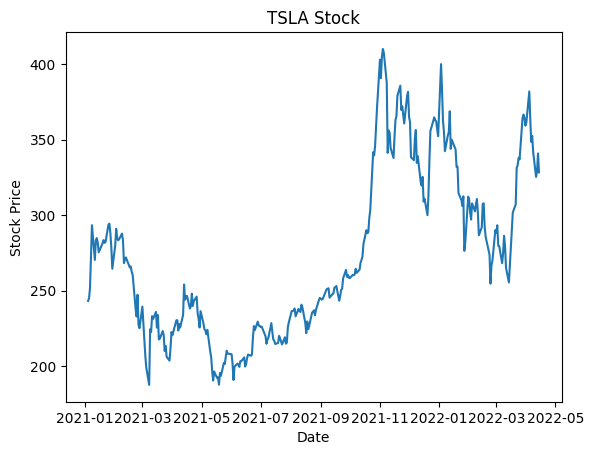

In [ ]:
# Plot the close prices of the stock to visually see the history
plt.plot(data.index, data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TSLA Stock')
plt.show()

In [ ]:
# Obtaining the latest stock price of Tesla
price = si.get_live_price('TSLA')
print(f"Tesla stock price: ${price:.2f}")

Tesla stock price: $241.94


In [ ]:
# Obtaining the latest news headlines related to Tesla form the yahoo
news = nw.get_yf_rss('TSLA')

# Displaying only 5 articles related to the TSLA stock
for i in range(len(news[:5])):
    headline = news[i]
    print(f"\nNews {i+1}:")
    print("Headline:", headline['title'])
    print("Link:", headline['link'])


News 1:
Headline: SpaceX’s Starship Will Launch Again Soon. There’s a Lesson for Tesla Investors.
Link: https://finance.yahoo.com/m/aa345b90-4fe6-344c-b7f3-d04f715f5c46/spacex%E2%80%99s-starship-will-launch.html?.tsrc=rss

News 2:
Headline: Tesla bulls and bears agree on one important point
Link: https://finance.yahoo.com/m/925e342c-6530-344b-8343-79ff7fab0418/tesla-bulls-and-bears-agree.html?.tsrc=rss

News 3:
Headline: Cathie Wood talks spot bitcoin ETF approval, Tesla, & the Fed
Link: https://finance.yahoo.com/video/cathie-wood-talks-spot-bitcoin-140420951.html?.tsrc=rss

News 4:
Headline: Tesla Stock Pops As China Registrations Continue To Lag With EV Giant Targeting 1.8 Million Deliveries
Link: https://finance.yahoo.com/m/c1cf1670-3785-374f-983c-75494dc60d07/tesla-stock-pops-as-china.html?.tsrc=rss

News 5:
Headline: Tesla can bar US factory workers from wearing union t-shirts, court rules
Link: https://finance.yahoo.com/news/tesla-bar-us-factory-workers-133949603.html?.tsrc=rss


In [ ]:
# This creating a SentimentIntensityAnalyzer object stored in 'a'
a = SentimentIntensityAnalyzer()

# Analyzing the sentiment of each news headline which is stored in a array list
sentiments = []
for headline in news:
    # Use the polarity_scores() method of the SentimentIntensityAnalyzer object to get the sentiment score of each headline
    sentiment = a.polarity_scores(headline['summary'])['compound']
    # Append the sentiment score to the list of sentiments
    sentiments.append(sentiment)

# Compute the average sentiment of the news
avg_sentiment = sum(sentiments) / len(sentiments)
# Print the average sentiment with two decimal points
print(f"Average sentiment of the news: {avg_sentiment:.2f}")

# Predict whether the stock price will increase or decrease based on the sentiment
if avg_sentiment > 0.1:
    print("There is a good sentiment. The value of the stock could rise.")
elif avg_sentiment < -0.1:
    print("There is a negative sentiment. The value of the stock price may fall.")
else:
    print("There is a neutral sentiment. The value of the stock price may not change significantly.")

Average sentiment of the news: 0.18
There is a good sentiment. The value of the stock could rise.


In [ ]:
# Using Support Vector Regression to Predict Tesla Stocks
# download the Tesla stock data from Yahoo Finance
tesla = yf.download("TSLA", start="2021-01-01", end="2022-04-26")

# create a DataFrame with the 'Close' column as the dependent variable
data = pd.DataFrame({'Close': tesla['Close']})

# create a new column for the independent variable (days since start)
data['Days'] = (data.index - data.index[0]).days

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Days'], data['Close'], test_size=0.2, random_state=0)

# create an instance of the linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train.values.reshape(-1, 1), y_train)

# use the model to make predictions on the testing data
y_pred = model.predict(X_test.values.reshape(-1, 1))

# calculate the R-squared value of the model
r_squared = model.score(X_test.values.reshape(-1, 1), y_test)

# print the R-squared value
print('R-squared:', r_squared)


[*********************100%%**********************]  1 of 1 completed
R-squared: 0.303497867566477


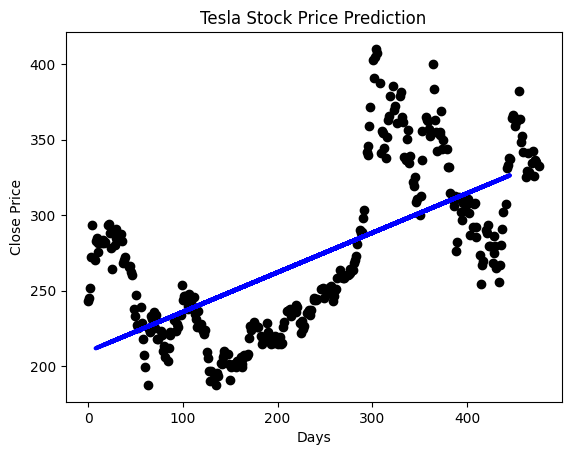

In [ ]:
# plot the data and the predictions
plt.scatter(data['Days'], data['Close'], color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Tesla Stock Price Prediction')
plt.show()

In [ ]:
# Using an Support Vector Machine to predict Tesla Stock
tesla = yf.download("TSLA", start="2021-01-01", end="2022-04-26")

# create a DataFrame with the 'Close' column as the dependent variable
data = pd.DataFrame({'Close': tesla['Close']})

# create a new column for the independent variable (days since start)
data['Days'] = (data.index - data.index[0]).days

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Days'].values.reshape(-1, 1), data['Close'].values, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create and fit the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)

# make predictions on the test set
y_pred = svr.predict(X_test)

[*********************100%%**********************]  1 of 1 completed


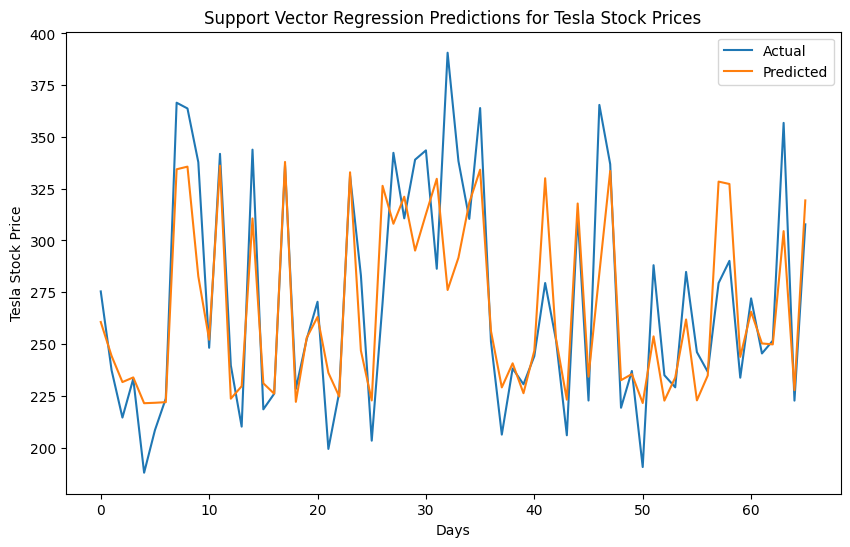

In [ ]:
# plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.title('Support Vector Regression Predictions for Tesla Stock Prices')
plt.legend()
plt.show()